# Data Analysis

In [1]:
dataRootFolder = './data'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Theming
sns.set_theme()
sns.set_style("white") # could be whitegrid

# from https://jwalton.info/Embed-Publication-Matplotlib-Latex/
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 8pt font in plots "Figure Labels: Use 8 point Times New Roman for Figure labels."
    "axes.labelsize": 8,
    "font.size": 8,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

# Assign colors so they stay consistent
colors = {
    'A': sns.color_palette('bright').as_hex()[2],
    'B': sns.color_palette('bright').as_hex()[5],
    'Jayvee': sns.color_palette('bright').as_hex()[1],
    'Python': sns.color_palette('bright').as_hex()[0]
}

# Description of Population

In [3]:
import pandas as pd

df = pd.read_csv(f'{dataRootFolder}/generated/entry-exit-anon.csv',sep=',')
dfEntry = df[df['isExit'] == False]

print(dfEntry.shape[0])

print(dfEntry["On a scale from 1 to 10, how do you estimate your programming experience?"].median())
print(dfEntry["How do you estimate your programming experience compared to your classmates?"].median())
print(dfEntry["How experienced are you with the following language: Python?"].median())
print(dfEntry["How experienced are you with the following language: Jayvee?"].median())

223
7.0
3.0
4.0
1.0


# Surveys and reponse rate
- Calculated for each task

In [4]:
import pandas as pd

df = pd.read_csv(f'{dataRootFolder}/generated/entry-exit-anon.csv',sep=',')

dfEntry = df[df['isExit'] == False]

print(dfEntry.shape[0])

responses = pd.read_csv(f'{dataRootFolder}/generated/survey-responses.csv')

responsesByExercise = {}
for x in range(1, 6):
    responsesByExercise[x] = responses[responses['survey'] == x]
    print(f'Ex{x}, responses and response rate')
    print(responsesByExercise[x].shape[0])
    print(round(responsesByExercise[x].shape[0] / dfEntry.shape[0] * 100, 2))

223
Ex1, responses and response rate
95
42.6
Ex2, responses and response rate
61
27.35
Ex3, responses and response rate
25
11.21
Ex4, responses and response rate
35
15.7
Ex5, responses and response rate
33
14.8


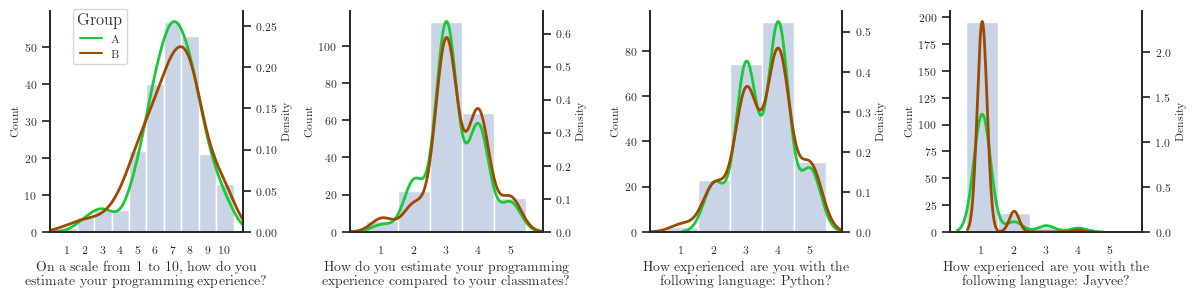

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

df = pd.read_csv(f'{dataRootFolder}/generated/entry-exit-anon.csv',sep=',')

def createHist(dataFrame, ax, question: str, max: int, title: str):
    ax2 = ax.twinx()

    sns.kdeplot(
            dataFrame,
            x=question,
            ax=ax2,
            hue='Group',
            common_norm=False,
            # https://seaborn.pydata.org/tutorial/color_palettes.html
            palette=colors,
            linewidth=2,
            legend=False
        )

    sns.histplot(
        data=dataFrame,
        x=question,
        ax=ax,
        #multiple='stack',
        element='bars',
        #palette=colors,
        #hue='Group',
        legend=False,
        #kde=True,
        discrete=True,
        #shrink=0.8,
        alpha=0.3
    )

    ax.set_xlabel(title, size = 10)
    ax.set_xticks(range(1, max + 1))

    ax.set_xlim(0, max + 1)

    sns.despine(right=False)

    return [ax, ax2]

def createSurveyPlot(dataFrame):
    fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

    ax1 = createHist(dataFrame, ax1, 'On a scale from 1 to 10, how do you estimate your programming experience?', 10, 'On a scale from 1 to 10, how do you\nestimate your programming experience?')
    ax2 = createHist(dataFrame, ax2, 'How do you estimate your programming experience compared to your classmates?', 5, 'How do you estimate your programming\nexperience compared to your classmates?')
    ax3 = createHist(dataFrame, ax3, 'How experienced are you with the following language: Python?', 5, 'How experienced are you with the\nfollowing language: Python?')
    ax4 = createHist(dataFrame, ax4, 'How experienced are you with the following language: Jayvee?', 5, 'How experienced are you with the\nfollowing language: Jayvee?')

    aLine = mlines.Line2D([], [], color=colors['A'], label='A')
    bLine = mlines.Line2D([], [], color=colors['B'], label='B')

    fig.legend(handles=[aLine, bLine], title='Group', fontsize=8, bbox_to_anchor=(0.112, 0.985))
    fig.tight_layout()

    return plt

courseEntryPlot = createSurveyPlot(df[df['isExit'] == False])
courseEntryPlot.savefig('figures/course-entry.pdf', dpi=300, format='pdf', bbox_inches='tight')

courseEntryPlot.show()

# Distributuion
- We test here with Shapiro-Wilk test for normality, nothing is normal distributed -> use non-parametric tests
- Experience: MWU

In [6]:
import pingouin as pg

df = pd.read_csv(f'{dataRootFolder}/generated/entry-exit-anon.csv',sep=',')
df = df[df['isExit'] == False]

dfGroupA = df[df['Group'] == 'A']
dfGroupB = df[df['Group'] == 'B']

print(pg.normality(dfGroupA['On a scale from 1 to 10, how do you estimate your programming experience?']))
print(pg.normality(dfGroupB['On a scale from 1 to 10, how do you estimate your programming experience?']))
print(pg.normality(dfGroupA['How do you estimate your programming experience compared to your classmates?']))
print(pg.normality(dfGroupB['How do you estimate your programming experience compared to your classmates?']))
print(pg.normality(dfGroupA['How experienced are you with the following language: Python?']))
print(pg.normality(dfGroupB['How experienced are you with the following language: Python?']))
print(pg.normality(dfGroupA['How experienced are you with the following language: Jayvee?']))
print(pg.normality(dfGroupB['How experienced are you with the following language: Jayvee?']))

                                                          W      pval  normal
On a scale from 1 to 10, how do you estimate yo...  0.93255  0.000031   False
                                                           W     pval  normal
On a scale from 1 to 10, how do you estimate yo...  0.945973  0.00018   False
                                                           W          pval  \
How do you estimate your programming experience...  0.869038  2.046303e-08   

                                                    normal  
How do you estimate your programming experience...   False  
                                                           W          pval  \
How do you estimate your programming experience...  0.862168  7.589612e-09   

                                                    normal  
How do you estimate your programming experience...   False  
                                                           W          pval  \
How experienced are you with the following lang...  

In [7]:
import pingouin as pg
import pandas as pd

df = pd.read_csv(f'{dataRootFolder}/generated/entry-exit-anon.csv',sep=',')
df = df[df['isExit'] == False]

dfGroupA = df[df['Group'] == 'A']
dfGroupB = df[df['Group'] == 'B']

results = pd.DataFrame(
    columns=['Experience', '$n_{1}$', '$n_{2}$', '$Mdn_{1}$', '$Mdn_{2}$', 'U', 'p-value (two-sided)']
)

programmingExperience = pg.mwu(
    x=dfGroupA['On a scale from 1 to 10, how do you estimate your programming experience?'],
    y=dfGroupB['On a scale from 1 to 10, how do you estimate your programming experience?'],
    alternative = 'two-sided'
)

results.loc[0] = [
    'Programming',
    len(dfGroupA),
    len(dfGroupB),
    dfGroupA['On a scale from 1 to 10, how do you estimate your programming experience?'].median(),
    dfGroupB['On a scale from 1 to 10, how do you estimate your programming experience?'].median(),
    programmingExperience['U-val'].values[0],
    programmingExperience['p-val'].values[0],
]

python = pg.mwu(
    x=dfGroupA['How experienced are you with the following language: Python?'],
    y=dfGroupB['How experienced are you with the following language: Python?'],
    alternative = 'two-sided'
)

results.loc[1] = [
    'Python',
    len(dfGroupA),
    len(dfGroupB),
    dfGroupA['How experienced are you with the following language: Python?'].median(),
    dfGroupB['How experienced are you with the following language: Python?'].median(),
    python['U-val'].values[0],
    python['p-val'].values[0],
]

jayvee = pg.mwu(
    x=dfGroupA['How experienced are you with the following language: Jayvee?'],
    y=dfGroupB['How experienced are you with the following language: Jayvee?'],
    alternative = 'two-sided'
)

results.loc[2] = [
    'Jayvee',
    len(dfGroupA),
    len(dfGroupB),
    dfGroupA['How experienced are you with the following language: Jayvee?'].median(),
    dfGroupB['How experienced are you with the following language: Jayvee?'].median(),
    jayvee['U-val'].values[0],
    jayvee['p-val'].values[0],
]

PYvsJV = pg.mwu(
    x=df['How experienced are you with the following language: Python?'],
    y=df['How experienced are you with the following language: Jayvee?'],
    alternative = 'two-sided'
)

results.loc[3] = [
    'JayveeVSPython',
    len(df),
    len(df),
    df['How experienced are you with the following language: Python?'].median(),
    df['How experienced are you with the following language: Jayvee?'].median(),
    PYvsJV['U-val'].values[0],
    PYvsJV['p-val'].values[0],
]

results.head()

,Experience,$n_{1}$,$n_{2}$,$Mdn_{1}$,$Mdn_{2}$,U,p-value (two-sided)
0,Programming,110,113,7.0,7.0,6224.0,9.856464e-01
1,Python,110,113,4.0,4.0,6198.0,9.709893e-01
2,Jayvee,110,113,1.0,1.0,6547.5,2.234207e-01
3,JayveeVSPython,223,223,4.0,1.0,48398.0,1.406304e-74


# Time spent

removed 15 outliers


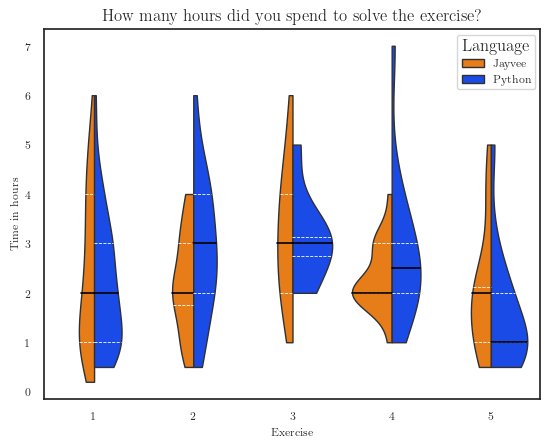

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

responses = pd.read_csv(f'{dataRootFolder}/generated/survey-responses.csv')

# Calculate the interquartile range for outlier detection
Q3 = responses['time'].quantile(q=0.75, interpolation='midpoint')
Q1 = responses['time'].quantile(q=0.25, interpolation='midpoint')
IQR = Q3 - Q1

# Typical values for outlier detection are 1.5 times IQR
responsesWithoutOutliers = responses[(responses['time'] >= Q1 - 1.5 * IQR) & (responses['time'] <= Q3 + 1.5 * IQR)]
print(f'removed {len(responses) - len(responsesWithoutOutliers)} outliers')

ax = sns.violinplot(
    data=responsesWithoutOutliers,
    x="survey",
    y="time",
    hue="language",
    split=True,
    saturation=0.8,
    cut=0,
    inner="quart",
    palette=colors,
    linewidth=1,
)

# from https://stackoverflow.com/questions/60638344/quartiles-line-properties-in-seaborn-violinplot
for l in ax.lines:
    l.set_linestyle('--')
    l.set_linewidth(0.6)
    l.set_color('white')
    l.set_alpha(1)
for l in ax.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(1.2)
    l.set_color('black')
    l.set_alpha(1)

ax.set(xlabel='Exercise',
       ylabel='Time in hours',
       title='How many hours did you spend to solve the exercise?')
ax.get_legend().set_title("Language")

plt.savefig('figures/time.pdf', dpi=300, format='pdf', bbox_inches='tight')

plt.show()

# What is the users perception of difficulty and quality?

/Users/rhazn/development/projects/2025-SPE-data-release/.venv/lib/python3.11/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Users/rhazn/development/projects/2025-SPE-data-release/.venv/lib/python3.11/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


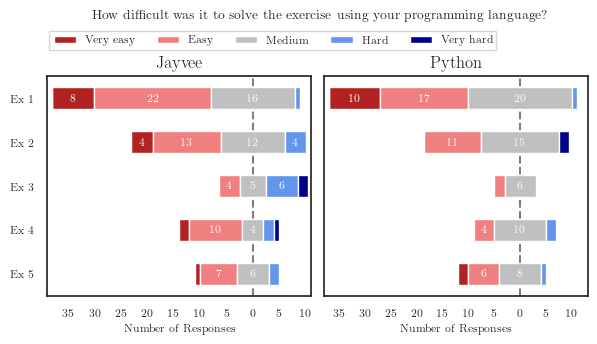

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plot_likert

responses = pd.read_csv(f'{dataRootFolder}/generated/survey-responses.csv')
responsesJV = responses[responses['language'] == 'Jayvee']
responsesPY = responses[responses['language'] == 'Python']

answerOptions = [
    'Very easy',
    'Easy',
    'Medium',
    'Hard',
    'Very hard',
]

dfDifficultJV = pd.DataFrame({
    'Ex 1': responsesJV[responsesJV['survey'] == 1]['difficulty'],
    'Ex 2': responsesJV[responsesJV['survey'] == 2]['difficulty'],
    'Ex 3': responsesJV[responsesJV['survey'] == 3]['difficulty'],
    'Ex 4': responsesJV[responsesJV['survey'] == 4]['difficulty'],
    'Ex 5': responsesJV[responsesJV['survey'] == 5]['difficulty'],
}
)

dfDifficultPY = pd.DataFrame({
    'Ex 1': responsesPY[responsesPY['survey'] == 1]['difficulty'],
    'Ex 2': responsesPY[responsesPY['survey'] == 2]['difficulty'],
    'Ex 3': responsesPY[responsesPY['survey'] == 3]['difficulty'],
    'Ex 4': responsesPY[responsesPY['survey'] == 4]['difficulty'],
    'Ex 5': responsesPY[responsesPY['survey'] == 5]['difficulty'],
}
)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

plot_likert.plot_likert(dfDifficultJV, answerOptions, 
                        plot_percentage=False,  # show absolute values
                        ax=ax1,  # show on the left-side subplot
                        legend=0,  # hide the legend for the subplot, we'll show a single figure legend instead  
                        #width=0.35,  # make the bars slimmer  
                        bar_labels=True,
                        bar_labels_color="snow",
                        colors=plot_likert.colors.default_with_darker_neutral,
                        xtick_interval=5                 
                       );
plot_likert.plot_likert(dfDifficultPY, answerOptions, 
                        plot_percentage=False,  # show absolute values
                        ax=ax2,  # show on the right-side subplot
                        legend=0,  # hide the legend for the subplot, we'll show a single figure legend instead
                        #width=0.35,  # make the bars slimmer
                        bar_labels=True,
                        bar_labels_color="snow",
                        colors=plot_likert.colors.default_with_darker_neutral,
                        xtick_interval=5 
                       );

ax1.set_title('Jayvee')
ax2.set_title('Python')
ax2.set_yticklabels([])

# display a single legend for the whole figure
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.075, 1.065), ncol=5, fancybox=False, shadow=False)

fig.tight_layout(pad=1.0)
plt.suptitle('How difficult was it to solve the exercise using your programming language?', y=1.12, x=0.535)

plt.savefig('figures/difficulty.pdf', dpi=300, format='pdf', bbox_inches='tight')

plt.show()

/Users/rhazn/development/projects/2025-SPE-data-release/.venv/lib/python3.11/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Users/rhazn/development/projects/2025-SPE-data-release/.venv/lib/python3.11/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


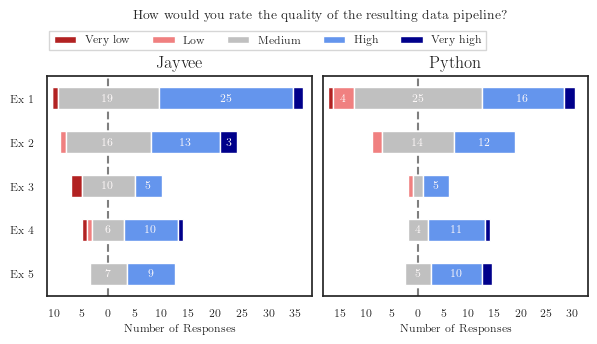

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plot_likert

responses = pd.read_csv(f'{dataRootFolder}/generated/survey-responses.csv')
responsesJV = responses[responses['language'] == 'Jayvee']
responsesPY = responses[responses['language'] == 'Python']

answerOptions = [
    'Very low',
    'Low',
    'Medium',
    'High',
    'Very high',
]

dfQualityJV = pd.DataFrame({
    'Ex 1': responsesJV[responsesJV['survey'] == 1]['quality'],
    'Ex 2': responsesJV[responsesJV['survey'] == 2]['quality'],
    'Ex 3': responsesJV[responsesJV['survey'] == 3]['quality'],
    'Ex 4': responsesJV[responsesJV['survey'] == 4]['quality'],
    'Ex 5': responsesJV[responsesJV['survey'] == 5]['quality'],
}
)

dfQualityPY = pd.DataFrame({
    'Ex 1': responsesPY[responsesPY['survey'] == 1]['quality'],
    'Ex 2': responsesPY[responsesPY['survey'] == 2]['quality'],
    'Ex 3': responsesPY[responsesPY['survey'] == 3]['quality'],
    'Ex 4': responsesPY[responsesPY['survey'] == 4]['quality'],
    'Ex 5': responsesPY[responsesPY['survey'] == 5]['quality'],
}
)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

plot_likert.plot_likert(dfQualityJV, answerOptions, 
                        plot_percentage=False,  # show absolute values
                        ax=ax1,  # show on the left-side subplot
                        legend=0,  # hide the legend for the subplot, we'll show a single figure legend instead  
                        #width=0.35,  # make the bars slimmer  
                        bar_labels=True,
                        bar_labels_color="snow",
                        colors=plot_likert.colors.default_with_darker_neutral,
                        xtick_interval=5                   
                       );
plot_likert.plot_likert(dfQualityPY, answerOptions, 
                        plot_percentage=False,  # show absolute values
                        ax=ax2,  # show on the right-side subplot
                        legend=0,  # hide the legend for the subplot, we'll show a single figure legend instead
                        #width=0.35,  # make the bars slimmer
                        bar_labels=True,
                        bar_labels_color="snow",
                        colors=plot_likert.colors.default_with_darker_neutral,
                        xtick_interval=5 
                       );

ax1.set_title('Jayvee')
ax2.set_title('Python')
ax2.set_yticklabels([])

# display a single legend for the whole figure
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.075, 1.065), ncol=5, fancybox=False, shadow=False)

fig.tight_layout(pad=1.0)
plt.suptitle('How would you rate the quality of the resulting data pipeline?', y=1.12, x=0.535)

plt.savefig('figures/quality.pdf', dpi=300, format='pdf', bbox_inches='tight')

plt.show()

# MWU tests for statistical data

In [11]:
import pingouin as pg
import pandas as pd

responses = pd.read_csv(f'{dataRootFolder}/generated/survey-responses.csv')

responsesReplacedLikert = responses.replace({
    'Very easy': 1,
    'Very low': 1,
    'Easy': 2,
    'Low': 2,
    'Medium': 3,
    'Hard': 4,
    'High': 4,
    'Very hard': 5,
    'Very high': 5,
})

def mwusForExercises(allResponses, depVariable, alternative = 'two-sided'):
    responsesByExercise = {}
    for x in range(1, 6):
        responsesByExercise[x] = allResponses[allResponses['survey'] == x]

    tests = pd.DataFrame(
        columns=['Exercise', '$n_{1}$', '$n_{2}$', 'Mdn' + '_{1}$', 'Mdn' + '_{2}$', 'U', f'p-value ({alternative})']
    )

    for i in range(1, 6):
        responses = responsesByExercise[i]
        responsesJV = responses[responses['language'] == 'Jayvee']
        responsesPY = responses[responses['language'] == 'Python']

        statTest = pg.mwu(
            x=responsesJV[depVariable],
            y=responsesPY[depVariable],
            alternative = alternative
        )

        print(statTest)

        tests.loc[i] = [
            f'Ex{i}',
            len(responsesJV),
            len(responsesPY),
            round(responsesJV[depVariable].median(), 3),
            round(responsesPY[depVariable].median(), 3),
            round(statTest['U-val'].values[0], 3),
            round(statTest['p-val'].values[0], 3),
        ]

    allResponsesJV = allResponses[allResponses['language'] == 'Jayvee']
    allResponsesPY = allResponses[allResponses['language'] == 'Python']

    statTest = pg.mwu(
        x=allResponsesJV[depVariable],
        y=allResponsesPY[depVariable],
        alternative = alternative
    )

    print(statTest)

    tests.loc[6] = [
        f'All',
        len(allResponsesJV),
        len(allResponsesPY),
        round(allResponsesJV[depVariable].median(), 3),
        round(allResponsesPY[depVariable].median(), 3),
        round(statTest['U-val'].values[0], 3),
        round(statTest['p-val'].values[0], 3),
    ]

    return tests

/var/folders/tq/ppy7x00d4kn0z3bgzscqy3mc0000gp/T/ipykernel_46913/1047480601.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  responsesReplacedLikert = responses.replace({


# Time
- Outliers removed

In [12]:
time = mwusForExercises(responsesWithoutOutliers, 'time', 'less')
time.head(6)

      U-val alternative    p-val       RBC      CLES
MWU  1159.5        less  0.79351 -0.096454  0.451773
     U-val alternative   p-val       RBC      CLES
MWU  243.0        less  0.0417  0.276786  0.638393
     U-val alternative     p-val       RBC      CLES
MWU   72.0        less  0.605769 -0.058824  0.470588
     U-val alternative   p-val       RBC      CLES
MWU  113.0        less  0.2017  0.162963  0.581481
     U-val alternative     p-val       RBC      CLES
MWU  162.5        less  0.915084 -0.269531  0.365234
      U-val alternative     p-val       RBC      CLES
MWU  7060.0        less  0.682467 -0.035191  0.482405


,Exercise,$n_{1}$,$n_{2}$,Mdn_{1}$,Mdn_{2}$,U,p-value (less)
1,Ex1,45,47,2.0,2.0,1159.5,0.794
2,Ex2,28,24,2.0,3.0,243.0,0.042
3,Ex3,17,8,3.0,3.0,72.0,0.606
4,Ex4,18,15,2.0,2.5,113.0,0.202
5,Ex5,16,16,2.0,1.0,162.5,0.915
6,All,124,110,2.0,2.0,7060.0,0.682


# Difficulty

In [13]:
difficulty = mwusForExercises(responsesReplacedLikert, 'difficulty', 'less')

difficulty.head(6)

      U-val alternative     p-val       RBC      CLES
MWU  1086.5        less  0.371737  0.036791  0.518395
     U-val alternative    p-val      RBC      CLES
MWU  397.5        less  0.15781  0.13961  0.569805
     U-val alternative     p-val       RBC      CLES
MWU   93.0        less  0.942526 -0.367647  0.316176
     U-val alternative     p-val       RBC      CLES
MWU  102.0        less  0.039519  0.328947  0.664474
     U-val alternative     p-val       RBC      CLES
MWU  141.0        less  0.584499 -0.036765  0.481618
      U-val alternative    p-val       RBC      CLES
MWU  7429.5        less  0.29075  0.037879  0.518939


,Exercise,$n_{1}$,$n_{2}$,Mdn_{1}$,Mdn_{2}$,U,p-value (less)
1,Ex1,47,48,2.0,2.0,1086.5,0.372
2,Ex2,33,28,2.0,3.0,397.5,0.158
3,Ex3,17,8,3.0,3.0,93.0,0.943
4,Ex4,19,16,2.0,3.0,102.0,0.040
5,Ex5,16,17,2.5,3.0,141.0,0.584
6,All,132,117,2.0,3.0,7429.5,0.291


# Quality

In [14]:
quality = mwusForExercises(responsesReplacedLikert, 'quality', 'greater')

quality.head(6)

      U-val alternative     p-val       RBC      CLES
MWU  1377.0     greater  0.020553 -0.220745  0.610372
     U-val alternative     p-val       RBC      CLES
MWU  515.0     greater  0.199581 -0.114719  0.557359
     U-val alternative     p-val       RBC      CLES
MWU   47.5     greater  0.910838  0.301471  0.349265
     U-val alternative     p-val       RBC      CLES
MWU  122.5     greater  0.872588  0.194079  0.402961
     U-val alternative     p-val       RBC      CLES
MWU  107.5     greater  0.884361  0.209559  0.395221
      U-val alternative     p-val      RBC     CLES
MWU  7882.0     greater  0.377877 -0.02072  0.51036


,Exercise,$n_{1}$,$n_{2}$,Mdn_{1}$,Mdn_{2}$,U,p-value (greater)
1,Ex1,47,48,4.0,3.0,1377.0,0.021
2,Ex2,33,28,3.0,3.0,515.0,0.200
3,Ex3,17,8,3.0,4.0,47.5,0.911
4,Ex4,19,16,4.0,4.0,122.5,0.873
5,Ex5,16,17,4.0,4.0,107.5,0.884
6,All,132,117,4.0,4.0,7882.0,0.378
